In [29]:
import pandas as pd
from pgmpy.models import LinearGaussianBayesianNetwork
from pgmpy.factors.continuous import LinearGaussianCPD

# Constants
DATA_FOLDER = "data/"
FRAMINGHAM = {"name": "framingham.csv",
              "numeric_columns": ["age", "education", "cigsPerDay", "BPMeds", "totChol", "sysBP", "diaBP", "heartRate", "glucose"], # TODO - check about education
              }

framingham_df = pd.read_csv(DATA_FOLDER + FRAMINGHAM["name"])

print(framingham_df.shape)
# print(framingham_df.head())

framingham_df = framingham_df[FRAMINGHAM["numeric_columns"]]
framingham_df.dropna(inplace=True)

# Verify that there are no missing values
print("Total amount of missing values:", framingham_df.isnull().sum().sum())
print("New shape:", framingham_df.shape)

df = framingham_df

(4240, 16)
Total amount of missing values: 0
New shape: (3671, 9)


In [36]:
from pgmpy.estimators import PC

# Use the PC Algorithm for structure learning
pc = PC(df)
pc_model = pc.estimate()

# View the learned structure
model_structure = pc_model.edges()
print(model_structure)


  0%|          | 0/5 [00:00<?, ?it/s]

[('totChol', 'age'), ('sysBP', 'totChol'), ('diaBP', 'heartRate')]


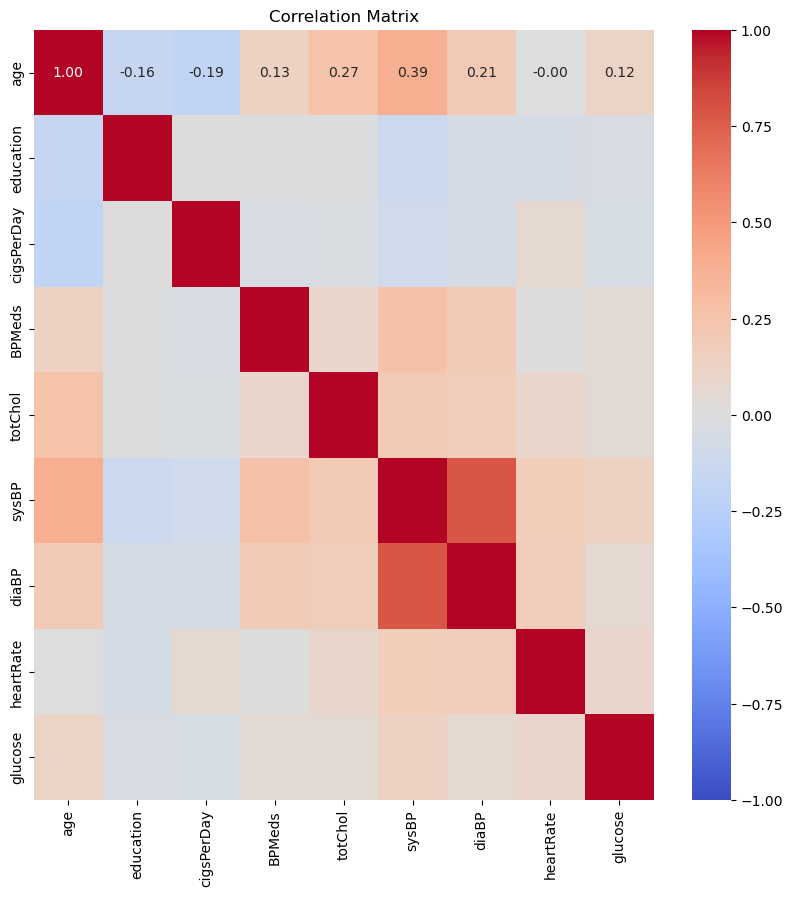

In [39]:
# Get heatmap of the correlation matrix with adjusted scale from -1 to 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
